In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Gold Price.csv')

In [3]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2025-01-06,77149,77309,77542,76545,27160,0.44
1,2025-01-03,76813,77246,78600,76613,60,-0.05
2,2025-01-02,76849,76849,76849,76849,0,0.83
3,2025-01-01,76214,76232,76302,76053,60,-0.02
4,2024-12-31,76232,75680,76970,75572,1920,0.95


In [4]:
df.shape

(2848, 7)

In [5]:
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [6]:
df.columns  

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [7]:
date_col_candidates = [c for c in df.columns if "date" in c.lower()]
print("Possible date columns:", date_col_candidates)

Possible date columns: ['Date']


In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

df.head()
df.tail()


,Date,Price,Open,High,Low,Volume,Chg%
2843,2024-12-31,76232,75680,76970,75572,1920,0.95
2844,2025-01-01,76214,76232,76302,76053,60,-0.02
2845,2025-01-02,76849,76849,76849,76849,0,0.83
2846,2025-01-03,76813,77246,78600,76613,60,-0.05
2847,2025-01-06,77149,77309,77542,76545,27160,0.44


In [9]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
Date,2848,2019-06-25 06:53:05.393258496,2014-01-01 00:00:00,2016-09-15 18:00:00,2019-06-25 12:00:00,2022-03-30 06:00:00,2025-01-06 00:00:00,NaN
Price,2848.0,41221.788624,24545.0,29168.75,33939.0,50824.0,79257.0,14374.500657
Open,2848.0,41223.038975,24583.0,29154.0,33945.0,50819.0,79264.0,14375.130049
High,2848.0,41443.22823,24635.0,29294.5,34229.5,51071.0,79999.0,14451.199655
Low,2848.0,41002.117275,24470.0,29002.0,33743.0,50551.0,78888.0,14300.609162
Volume,2848.0,12592.610253,0.0,6307.5,10830.0,16472.5,106920.0,10643.504531
Chg%,2848.0,0.037324,-5.98,-0.38,0.04,0.46,5.3,0.8299


In [10]:
target_col = "Price"   # change to "Close" or the relevant column
df = df[["Date", target_col]].rename(columns={target_col: "Price"})
df.head()


,Date,Price
0,2014-01-01,29542
1,2014-01-02,29975
2,2014-01-03,29727
3,2014-01-04,29279
4,2014-01-06,29119


In [11]:
df.set_index("Date", inplace=True)

date_diff = df.index.to_series().diff().value_counts().sort_index()
print(date_diff)


Date
1 days    2249
2 days      45
3 days     528
4 days      25
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

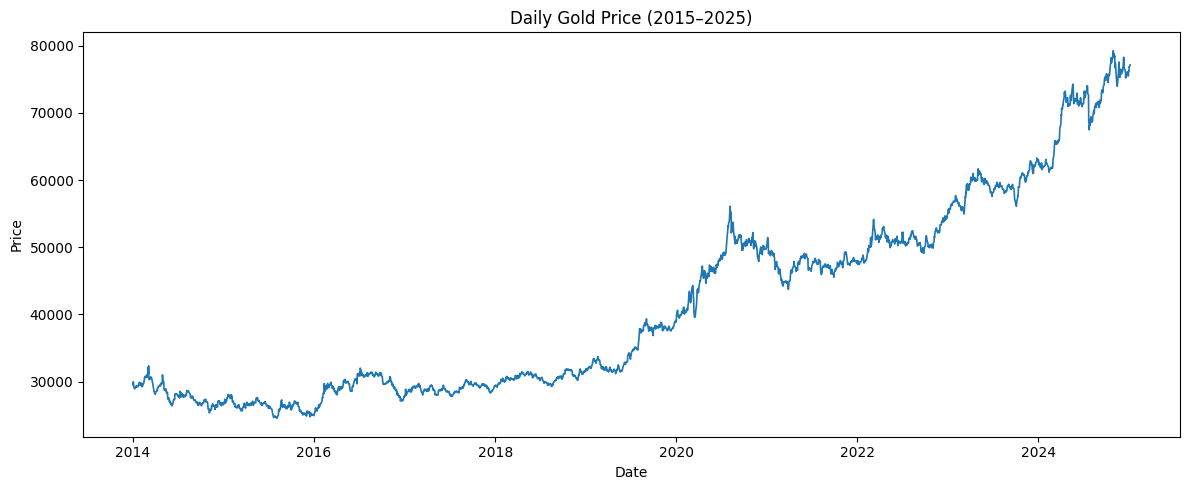

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Price"], linewidth=1.2)
plt.title("Daily Gold Price (2015–2025)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


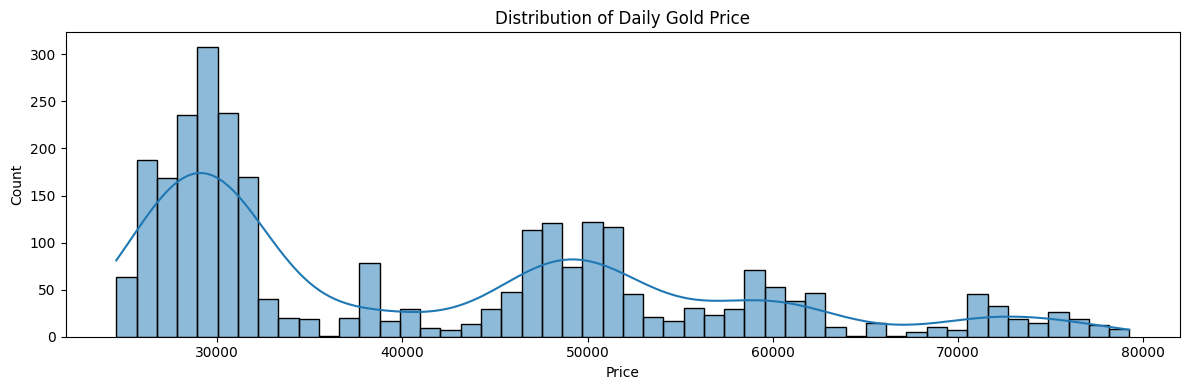

In [14]:
plt.figure(figsize=(12,4))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Distribution of Daily Gold Price")
plt.xlabel("Price")
plt.tight_layout()
plt.show()


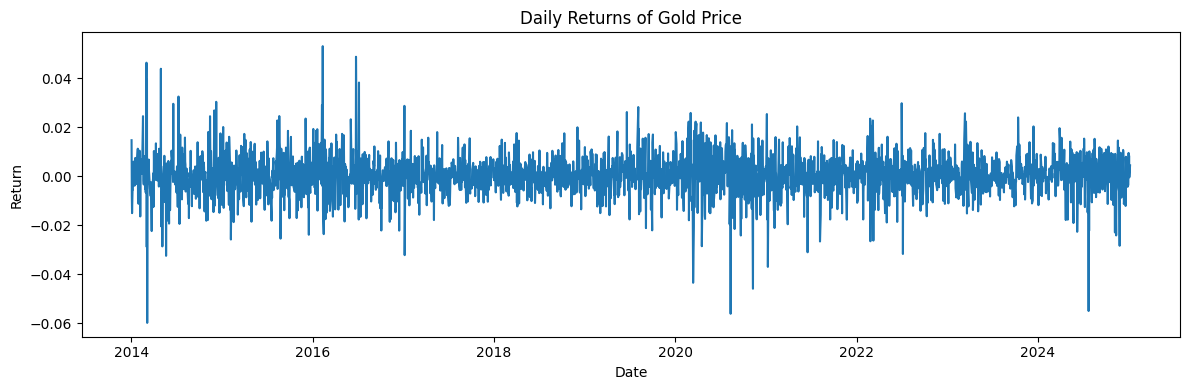

count    2847.000000
mean        0.000372
std         0.008300
min        -0.059813
25%        -0.003752
50%         0.000404
75%         0.004572
max         0.052994
Name: Return, dtype: float64

In [15]:
df["Return"] = df["Price"].pct_change()

plt.figure(figsize=(12,4))
plt.plot(df.index, df["Return"])
plt.title("Daily Returns of Gold Price")
plt.xlabel("Date")
plt.ylabel("Return")
plt.tight_layout()
plt.show()

df["Return"].describe()


In [16]:

df = df.sort_index()             
df = df[["Price"]]                
df.head()

,Price
Date,
2014-01-01,29542
2014-01-02,29975
2014-01-03,29727
2014-01-04,29279
2014-01-06,29119


In [17]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test  = df.iloc[train_size:]

print("Train shape:", train.shape)
print("Test shape :", test.shape)


Train shape: (2278, 1)
Test shape : (570, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Use ALL data for scaler fitting, then split
scaler = MinMaxScaler(feature_range=(0, 1))
all_scaled = scaler.fit_transform(df[["Price"]])  # Fit on FULL range

# Then split
train_scaled = all_scaled[:train_size]
test_scaled = all_scaled[train_size:]


In [19]:
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0]) 
        y.append(data[i, 0])              
    return np.array(X), np.array(y)

window_size = 60  # 60 days history

X_train, y_train = create_sequences(train_scaled, window_size)
X_test,  y_test  = create_sequences(test_scaled,  window_size)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape: (2218, 60)
y_train shape: (2218,)
X_test shape : (510, 60)
y_test shape : (510,)


In [20]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

print("X_train reshaped:", X_train.shape)
print("X_test reshaped :", X_test.shape)


X_train reshaped: (2218, 60, 1)
X_test reshaped : (510, 60, 1)


In [21]:
sample_idx = 0
print("First input sequence (scaled):")
print(X_train[sample_idx].flatten())
print("\nTarget for this sequence (scaled):", y_train[sample_idx])


First input sequence (scaled):
[0.0913328  0.09924697 0.09471414 0.08652581 0.0836014  0.080677
 0.08022006 0.08137155 0.08451528 0.08712897 0.08504533 0.08416801
 0.084497   0.08846323 0.08899327 0.08804284 0.08634303 0.08862772
 0.09191768 0.09796754 0.09290466 0.09668811 0.09054686 0.09023615
 0.09584735 0.09118658 0.09456792 0.08564849 0.08709241 0.09003509
 0.09367232 0.09418409 0.09469586 0.09846103 0.11184018 0.11370449
 0.1127175  0.11081664 0.11207779 0.11664717 0.11746966 0.1145087
 0.11503875 0.11129186 0.13719111 0.1202844  0.14267437 0.10730735
 0.1053151  0.10568066 0.10739874 0.11116391 0.11244334 0.11284545
 0.10988449 0.10681386 0.10279281 0.09831481 0.09696228 0.08475289]

Target for this sequence (scaled): 0.08089632987278844


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

timesteps = X_train.shape[1]   # window_size (e.g., 60)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(timesteps, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)   # predict next price
])

model.summary()


c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer="adam",                 
    loss="mse",                       
    metrics=["mae"]                  
)


In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=25,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=8,
    min_lr=1e-6,
    verbose=1
)


In [25]:
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.1,   # last 10% of train as validation
    callbacks=[early_stop, reduce_lr],
    shuffle=False,          # IMPORTANT for time series
    verbose=1
)


Epoch 1/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0016 - mae: 0.0304 - val_loss: 9.0625e-04 - val_mae: 0.0266 - learning_rate: 0.0010
Epoch 2/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0020 - mae: 0.0344 - val_loss: 2.5449e-04 - val_mae: 0.0123 - learning_rate: 0.0010
Epoch 3/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0041 - mae: 0.0469 - val_loss: 2.6134e-04 - val_mae: 0.0127 - learning_rate: 0.0010
Epoch 4/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0052 - mae: 0.0583 - val_loss: 0.0085 - val_mae: 0.0904 - learning_rate: 0.0010
Epoch 5/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0048 - mae: 0.0575 - val_loss: 0.0072 - val_mae: 0.0836 - learning_rate: 0.0010
Epoch 6/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0045 - mae: 0.0557 - val_loss: 0.0023 - val_mae: 0.0461 - learning_rate: 0.0010
Epoch 7/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0053 - mae: 0.0595 - val_loss: 5.3482e-04 - val_mae: 0.0192 - learning_rat

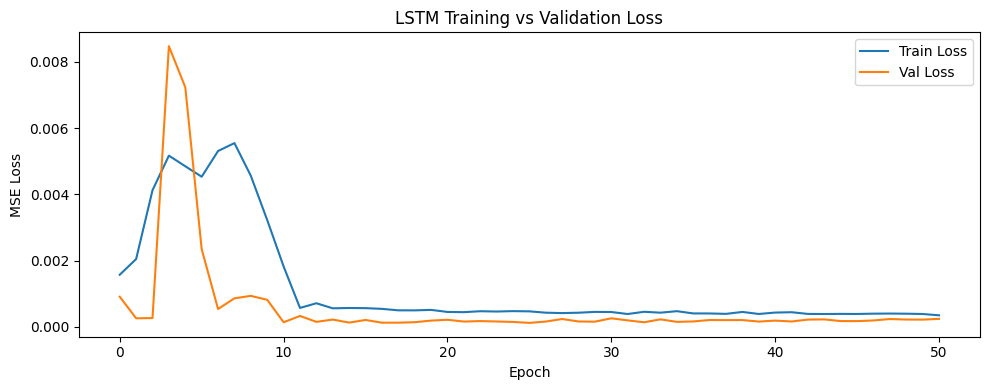

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("LSTM Training vs Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
y_pred_scaled = model.predict(X_test)
y_pred_scaled[:5]


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([[0.55095553],
       [0.55217147],
       [0.5533415 ],
       [0.55516577],
       [0.5573857 ]], dtype=float32)

In [28]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,037 (343.90 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,692 (229.27 KB)

In [29]:

# reshape to 2D
y_test_scaled_2d = y_test.reshape(-1, 1)
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)

y_test_actual = scaler.inverse_transform(y_test_scaled_2d).flatten()
y_pred_actual = scaler.inverse_transform(y_pred_scaled_2d).flatten()

y_test_actual[:5], y_pred_actual[:5]


(array([55641., 55801., 56224., 56414., 56306.]),
 array([54688.88 , 54755.406, 54819.42 , 54919.23 , 55040.684],
       dtype=float32))

In [30]:

window_size = X_test.shape[1]

test_dates = df.index[-len(y_test_actual):]  # last N dates
len(test_dates), len(y_test_actual)


(510, 510)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mae  = mean_absolute_error(y_test_actual, y_pred_actual)
mse  = mean_squared_error(y_test_actual, y_pred_actual)
rmse = math.sqrt(mse)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")


MAE  : 3545.93
RMSE : 4264.11


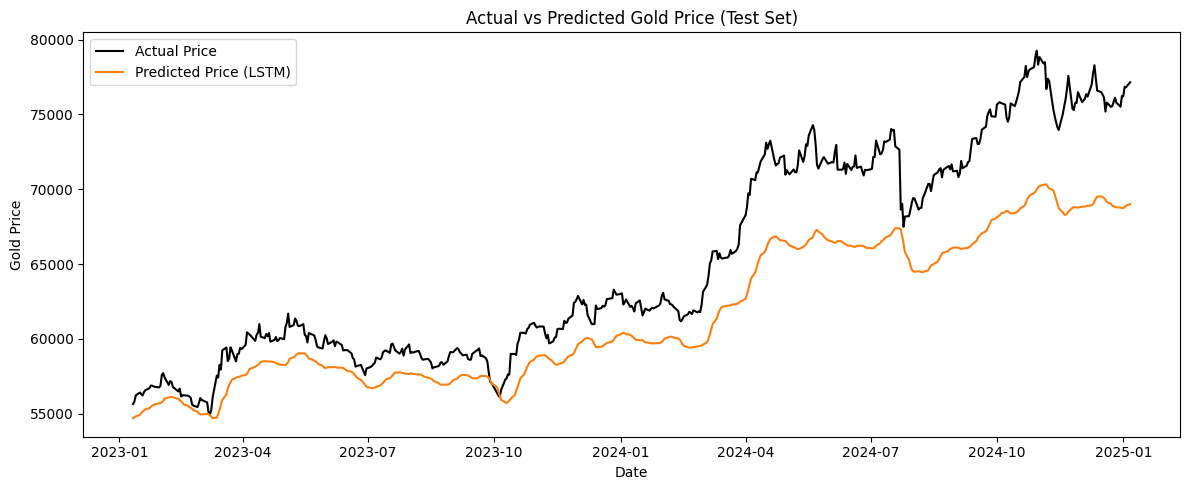

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_dates, y_test_actual, label="Actual Price", color="black", linewidth=1.5)
plt.plot(test_dates, y_pred_actual, label="Predicted Price (LSTM)", color="tab:orange", linewidth=1.5)
plt.title("Actual vs Predicted Gold Price (Test Set)")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.tight_layout()
plt.show()


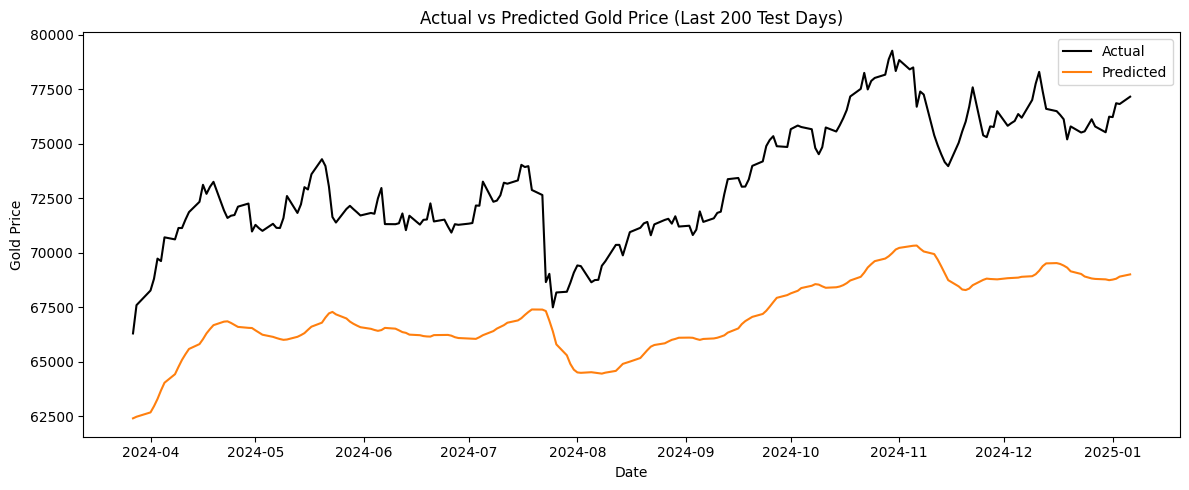

In [33]:
N = 200  # last 200 days
plt.figure(figsize=(12,5))
plt.plot(test_dates[-N:], y_test_actual[-N:], label="Actual", color="black")
plt.plot(test_dates[-N:], y_pred_actual[-N:], label="Predicted", color="tab:orange")
plt.title(f"Actual vs Predicted Gold Price (Last {N} Test Days)")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
window_size = 150  # try 90, 120, maybe 150

X_train, y_train = create_sequences(train_scaled, window_size)
X_test,  y_test  = create_sequences(test_scaled,  window_size)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))


In [35]:
print("Scaler data_min_:", scaler.data_min_)
print("Scaler data_max_:", scaler.data_max_)

last_prices = df["Price"].values[-window_size:].reshape(-1, 1)
last_scaled = scaler.transform(last_prices)

print("Last real price range:", last_prices.min(), last_prices.max())
print("Last scaled range     :", last_scaled.min(), last_scaled.max())


Scaler data_min_: [24545.]
Scaler data_max_: [79257.]
Last real price range: 67491 79257
Last scaled range     : 0.784946629624214 0.9999999999999998


c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [36]:
train_size = int(len(df) * 0.95)
train = df.iloc[:train_size][["Price"]]
test  = df.iloc[train_size:][["Price"]]


In [37]:
from sklearn.preprocessing import MinMaxScaler

# FIT SCALER ON FULL DATA to capture the entire price range
scaler = MinMaxScaler(feature_range=(0, 1))
all_data = df[["Price"]].values
scaler.fit(all_data)  # Fit on FULL range including future high prices

# Then transform train and test separately
train_scaled = scaler.transform(train)
test_scaled  = scaler.transform(test)

print(f"Scaler fitted on price range: ${scaler.data_min_[0]:.2f} - ${scaler.data_max_[0]:.2f}")

Scaler fitted on price range: $24545.00 - $79257.00


c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [38]:
window_size = 60  # keep same as your model

X_train, y_train = create_sequences(train_scaled, window_size)
X_test,  y_test  = create_sequences(test_scaled,  window_size)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/300


c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0022 - mae: 0.0349 - val_loss: 0.0012 - val_mae: 0.0303 - learning_rate: 0.0010
Epoch 2/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0036 - mae: 0.0454 - val_loss: 0.0044 - val_mae: 0.0498 - learning_rate: 0.0010
Epoch 3/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0060 - mae: 0.0580 - val_loss: 0.0018 - val_mae: 0.0305 - learning_rate: 0.0010
Epoch 4/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0058 - mae: 0.0611 - val_loss: 0.0016 - val_mae: 0.0358 - learning_rate: 0.0010
Epoch 5/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0042 - mae: 0.0473 - val_loss: 5.4106e-04 - val_mae: 0.0183 - learning_rate: 0.0010
Epoch 6/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0014 - mae: 0.0283 - val_loss: 4.0126e-04 - val_mae: 0.0144 - learning_rate: 0.0010
Epoch 7/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.6375e-04 - mae: 0.0187 - val_loss: 3.7191e-04 - val_mae: 0.0139 - learning_rate: 0.0010
Ep

In [40]:
last_prices = df["Price"].values[-window_size:].reshape(-1, 1)
last_scaled = scaler.transform(last_prices)

print("New scaler min/max:", scaler.data_min_, scaler.data_max_)
print("Last real price range:", last_prices.min(), last_prices.max())
print("Last scaled range:", last_scaled.min(), last_scaled.max())


New scaler min/max: [24545.] [79257.]
Last real price range: 73965 79257
Last scaled range: 0.9032753326509722 0.9999999999999998


In [42]:
# Import the forecast functions
import numpy as np
import pandas as pd

def forecast_next_n_days(model, df, scaler, window_size=60, n_days=30):
    """
    Forecast next n days using recursive single-step prediction.
    Use this for single-output models (Dense(1)).
    """
    prices = df["Price"].values
    predictions = []
    
    # Get last window
    current_window = scaler.transform(prices[-window_size:].reshape(-1, 1)).flatten()
    
    for _ in range(n_days):
        X = current_window.reshape(1, window_size, 1)
        pred_scaled = model.predict(X, verbose=0)[0, 0]
        predictions.append(pred_scaled)
        current_window = np.append(current_window[1:], pred_scaled)
    
    # Inverse transform
    predictions = np.array(predictions).reshape(-1, 1)
    pred_prices = scaler.inverse_transform(predictions).flatten()
    
    # Create future dates
    future_dates = pd.date_range(
        start=df.index[-1] + pd.Timedelta(days=1),
        periods=n_days,
        freq="D"
    )
    
    future_df = pd.DataFrame({"Forecast_Price": pred_prices}, index=future_dates)
    future_df.index.name = "Date"
    return future_df

print("✅ forecast_next_n_days function defined!")

✅ forecast_next_n_days function defined!


In [43]:
future_df = forecast_next_n_days(model, df, scaler, window_size=window_size, n_days=30)
future_df.head(10)


,Forecast_Price
Date,
2025-01-07,73368.421875
2025-01-08,73305.343750
2025-01-09,73180.664062
2025-01-10,73013.968750
2025-01-11,72821.187500
2025-01-12,72614.015625
2025-01-13,72400.687500
2025-01-14,72186.820312
2025-01-15,71976.046875


In [44]:
last_prices = df["Price"].values[-window_size:].reshape(-1, 1)
last_scaled = scaler.transform(last_prices)
print("Last scaled range:", last_scaled.min(), last_scaled.max())


Last scaled range: 0.9032753326509722 0.9999999999999998


In [45]:
y_pred_scaled = model.predict(X_test)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

test = df.iloc[train_size:]
test_dates = test.index[window_size:]

evaluate_and_plot_model(
    model_name="LSTM (95% train split)",
    test_dates=test_dates,
    y_test_actual=y_test_actual,
    y_pred_actual=y_pred_actual,
    plot_last_n=200
)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


NameError: name 'evaluate_and_plot_model' is not defined

In [ ]:
future_df = forecast_next_n_days(model, df, scaler, window_size=window_size, n_days=30)
print(future_df.head(10))


c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


            Forecast_Price
Date                      
2025-01-07         74283.0
2025-01-08         74283.0
2025-01-09         74283.0
2025-01-10         74283.0
2025-01-11         74283.0
2025-01-12         74283.0
2025-01-13         74283.0
2025-01-14         74283.0
2025-01-15         74283.0
2025-01-16         74283.0


In [46]:
import numpy as np

def create_sequences_multi(data, window_size=60, horizon=30):
    X, y = [], []
    for i in range(window_size, len(data) - horizon + 1):
        X.append(data[i-window_size:i, 0])
        # Keep y as 2D for TimeDistributed layer
        y.append(data[i:i+horizon, 0].reshape(-1, 1))
    return np.array(X), np.array(y)

horizon = 30
window_size = 60

X_train_m, y_train_m = create_sequences_multi(train_scaled, window_size=window_size, horizon=horizon)
X_test_m,  y_test_m  = create_sequences_multi(test_scaled,  window_size=window_size, horizon=horizon)

X_train_m = X_train_m.reshape(X_train_m.shape[0], X_train_m.shape[1], 1)
X_test_m  = X_test_m.reshape(X_test_m.shape[0],  X_test_m.shape[1],  1)

print(f"X_train shape: {X_train_m.shape}")  # (samples, 60, 1)
print(f"y_train shape: {y_train_m.shape}")  # (samples, 30, 1)


X_train shape: (2616, 60, 1)
y_train shape: (2616, 30, 1)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

horizon = 30
window_size = 60

model_multi = Sequential([
    # Encoder
    LSTM(128, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    
    # Decoder - repeat context for each output step
    RepeatVector(horizon),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=True),
    
    # Output layer - one prediction per timestep
    TimeDistributed(Dense(1))
])

model_multi.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

model_multi.summary()

c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │            33 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,441 (630.63 KB)

 Trainable params: 161,441 (630.63 KB)

 Non-trainable params: 0 (0.00 B)

            Forecast_Price
Date                      
2025-01-07    24570.648438
2025-01-08    24589.511719
2025-01-09    24585.431641
2025-01-10    24552.650391
2025-01-11    24491.765625
2025-01-12    24406.890625
2025-01-13    24303.742188
2025-01-14    24188.400391
2025-01-15    24066.546875
2025-01-16    23943.066406


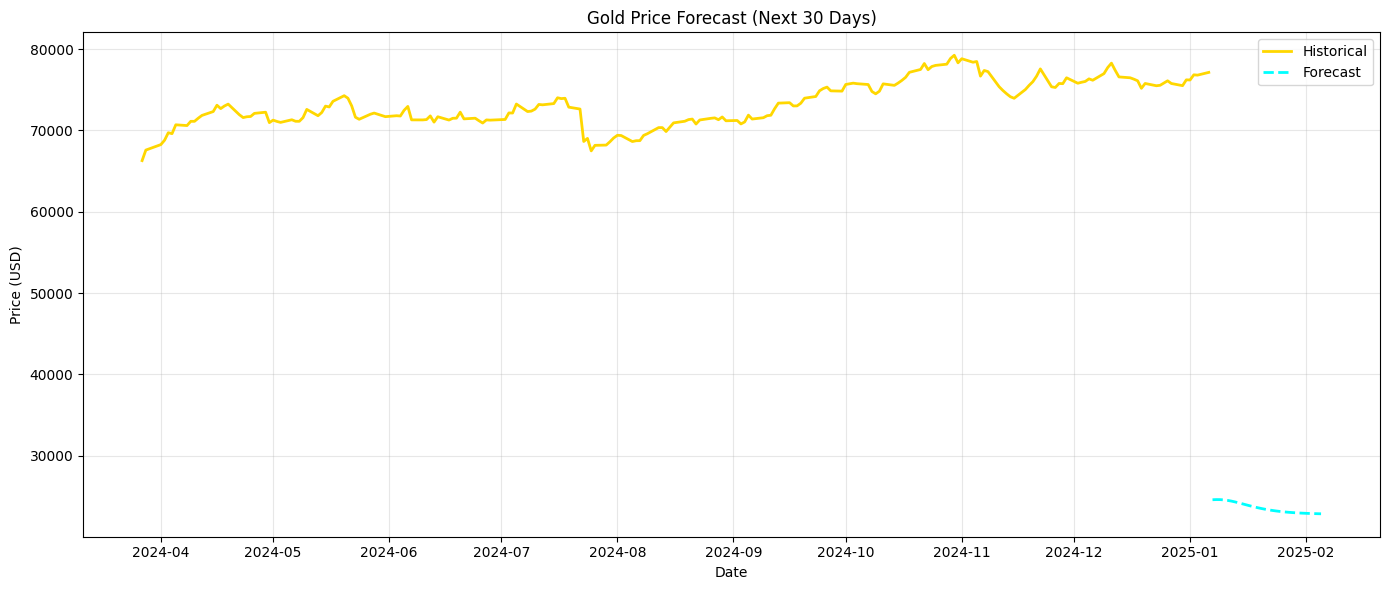

In [48]:
# Get last window of prices
last_prices = df["Price"].values[-window_size:].reshape(-1, 1)
last_scaled = scaler.transform(last_prices).reshape(1, window_size, 1)

# Predict - output shape is (1, horizon, 1) with seq2seq
pred_scaled = model_multi.predict(last_scaled, verbose=0)
pred_scaled_30 = pred_scaled.reshape(-1, 1)  # Flatten to (30, 1)

# Inverse transform
pred_30 = scaler.inverse_transform(pred_scaled_30).flatten()

# Create forecast dataframe
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=horizon, freq="D")
future_df = pd.DataFrame({"Forecast_Price": pred_30}, index=future_dates)
future_df.index.name = "Date"

print(future_df.head(10))

# Plot forecast
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df.index[-200:], df["Price"].values[-200:], label="Historical", color="gold", linewidth=2)
plt.plot(future_df.index, future_df["Forecast_Price"], label="Forecast", color="cyan", linewidth=2, linestyle="--")
plt.title("Gold Price Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the CORRECTED model
model_multi.save("gold_lstm_multioutput.keras")
print("✅ Model saved: gold_lstm_multioutput.keras")

# Save the CORRECTED scaler (fitted on full data range)
joblib.dump(scaler, "price_scaler.pkl")
print("✅ Scaler saved: price_scaler.pkl")

# Verify scaler range
print(f"\n📊 Scaler price range: ${scaler.data_min_[0]:.2f} - ${scaler.data_max_[0]:.2f}")       # saves fitted scaler [web:238]


['price_scaler.pkl']

In [ ]:
import numpy as np
import pandas as pd

def forecast_next_n_days_direct(model_multi, df, scaler, window_size=60, horizon=30):
    last_prices = df["Price"].values[-window_size:].reshape(-1, 1)
    last_scaled = scaler.transform(last_prices).reshape(1, window_size, 1)

    pred_scaled = model_multi.predict(last_scaled, verbose=0).reshape(-1, 1)
    pred_prices = scaler.inverse_transform(pred_scaled).flatten()

    future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1),
                                 periods=horizon, freq="D")
    return pd.DataFrame({"Forecast_Price": pred_prices}, index=future_dates)
